In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import scipy.io
import pandas as pd
from skimage import color
from skimage import io
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

Mounted at /content/drive


In [2]:
ctScans = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/ctscan_hw1.mat')
ctMasks = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/infmsk_hw1.mat')
ctScansembed = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/ctscan_embeddings_hw2.mat')

In [3]:
print(ctScansembed['feat'].shape)
X = ctScansembed['feat']

(3554, 1024)


In [4]:
(ms,ns,cs)= (ctScans['ctscan']).shape
(mm,nm,cm)= (ctMasks['infmsk']).shape
print((ms,ns,cs))
print((mm,nm,cm))

(512, 512, 3554)
(512, 512, 3554)


In [5]:
ctscansarray = []
ctmasksarray = []
for i in range(cm):
    ctscansarray.append((ctScans['ctscan'][:,:,i]))
    ctmasksarray.append((ctMasks['infmsk'][:,:,i]))

In [6]:
ctmasksHealthy = []
ctmasksInfected = []
Percentage_infection = []
for i in range(len(ctmasksarray)):
  ctmasksHealthy.append(np.sum((ctmasksarray[i])==2))
  ctmasksInfected.append(np.sum((ctmasksarray[i])==1))
  Percentage_infection.append((ctmasksInfected[i]/(ctmasksHealthy[i]+ctmasksInfected[i])) *100)

In [7]:
CtembedLabels = []
SevereInfCT = []
MildInfCT = []
NormalCT = []
for i in range(len(Percentage_infection)):
  if(Percentage_infection[i] >= 40):
    CtembedLabels.append(0)
  elif((Percentage_infection[i] > 0 ) and (Percentage_infection[i] < 40 )):
    CtembedLabels.append(1)
  else:
    CtembedLabels.append(2)

In [8]:
CtembedLabels = np.array(CtembedLabels)
print(CtembedLabels.shape)

(3554,)


In [9]:
n_components=1024
pca = PCA(n_components)
X_reduced = pca.fit_transform(X)

In [10]:
X = pd.DataFrame(X_reduced)
y = pd.Series(CtembedLabels)
# Experimented with two kinds of Dataset splits
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=123)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

1    1576
2    1138
0     129
dtype: int64

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [12]:
# generate predictions
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.9381153305203939


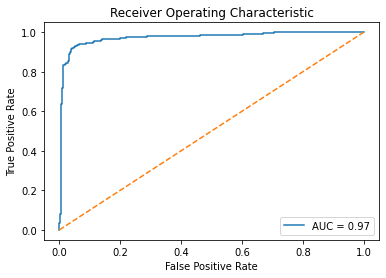

In [13]:
# predict probabilities for X_test using predict_proba
#Took help from Sklearn website
probabilities = svm.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate FPR and TPR at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the FPR on the x axis and the TPR on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [14]:
svm = SVC(kernel='rbf', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [15]:
# generate predictions
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.9184247538677919


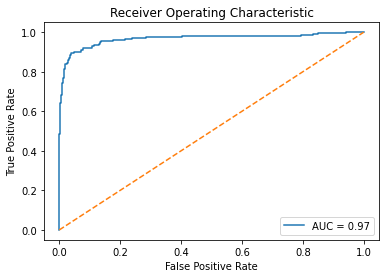

In [16]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate FPR and TPR at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the FPR on the x axis and the TPR on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [42]:
##NOW THE DATASET SPLIT AS PER THE Q2
#Applied SVM with Linear Kernel and RBF Kerner

In [17]:
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 
#print(x_train, x_val, x_test)

In [18]:
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [19]:
# generate predictions
y_pred = svm.predict(x_val)

# calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print('Validation accuracy is: ', accuracy)

Validation accuracy is:  0.9211267605633803


In [20]:
# generate predictions
y_pred = svm.predict(x_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.9339887640449438


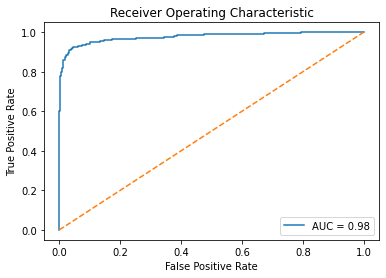

In [21]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(x_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate FPR and TPR at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the FPR on the x axis and the TPR on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='micro')

0.9339887640449438

In [23]:
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [24]:
svm = SVC(kernel='rbf', probability=True, random_state=42)

# fit model
svm.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [25]:
# generate predictions
y_pred = svm.predict(x_val)

# calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print('Validation accuracy is: ', accuracy)

Validation accuracy is:  0.895774647887324


In [26]:
# generate predictions
y_pred = svm.predict(x_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.922752808988764


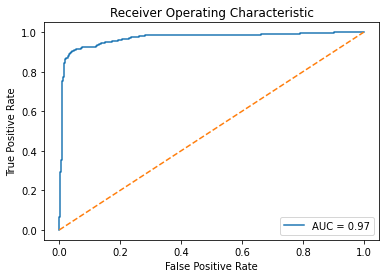

In [27]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(x_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate FPR and TPR at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the FPR on the x axis and the TPR on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [29]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred,average='micro'))

0.922752808988764


In [35]:
from sklearn.metrics import multilabel_confusion_matrix

In [36]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[683,   1],
        [  6,  22]],

       [[330,  12],
        [ 40, 330]],

       [[356,  42],
        [  9, 305]]])

In [37]:
cm = confusion_matrix(y_test, y_pred)

In [38]:
# Creating a dataframe for a array-formatted Confusion matrix, for easy plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Sever','Mild','Normal'], 
                     columns = ['Sever','Mild','Normal'])

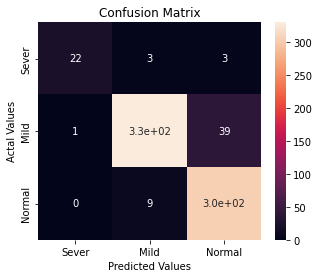

In [40]:
#Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()